In [46]:
import pandas as pd
data=pd.read_csv('Web Scraping.csv')
data.head()

,job_title,job_description,company,Town,City,country,date,work_hours,experience,experience_yreas,skills
0,Machine learning,AI/ML (Artificial Intelligence/Machine Learnin...,SURE International Technology,No twon avaliable,Cairo,Egypt,7 days ago,Full Time,Manager,5+ Yrs of Exp,IT/Software Development Operations/Manageme...
1,Machine learning,Senior Machine learning Engineer,Botit,Abdeen,Cairo,Egypt,5 days ago,Full Time,Experienced,3 - 7 Yrs of Exp,IT/Software Development Engineering - Telec...
2,Machine learning,ML Engineer - Recommendation System,TensorGraph,Maadi,Cairo,Egypt,13 days ago,Part TimeFreelance / Project,Entry Level,1+ Yrs of Exp,IT/Software Development Engineering - Telec...
3,Machine learning,Senior Computer Vision Engineer,wobot.ai,No twon avaliable,New Delhi,India,4 days ago,Full TimeWork From Home,Senior Management,3 - 6 Yrs of Exp,IT/Software Development Engineering - Telec...
4,Machine learning,Senior/Mid Senior Deep Learning Engineer,Confidential,Mokattam,Cairo,Egypt,1 month ago,Full Time,Experienced,4+ Yrs of Exp,IT/Software Development Engineering - Telec...


In [47]:
data.shape

(1560, 11)

<AxesSubplot:xlabel='Count', ylabel='City'>

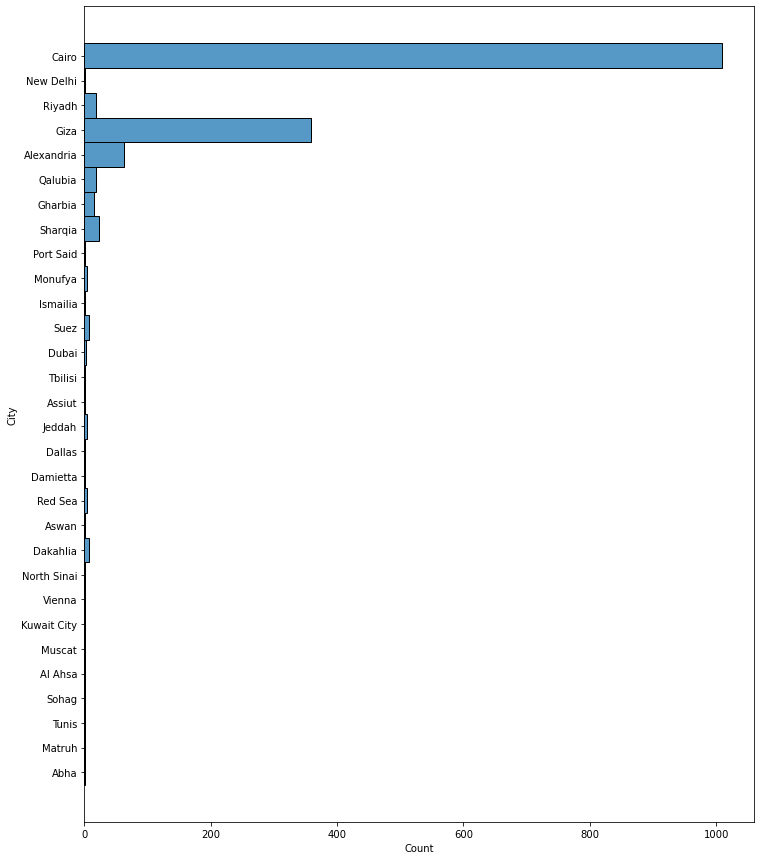

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,15))
sns.histplot(y=data.City)

# Machine learning

In [49]:
from collections import Counter
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
c1=Counter(data[data['job_title']=='Machine learning']['City'])
c1


Counter({'Cairo': 26, 'New Delhi': 1, 'Riyadh': 2, 'Giza': 10})

In [50]:
town=Counter(data[data['job_title']=='Machine learning']['Town'])
names = list(town.keys())
values = list(town.values())
names=names[1:]
values=values[1:]



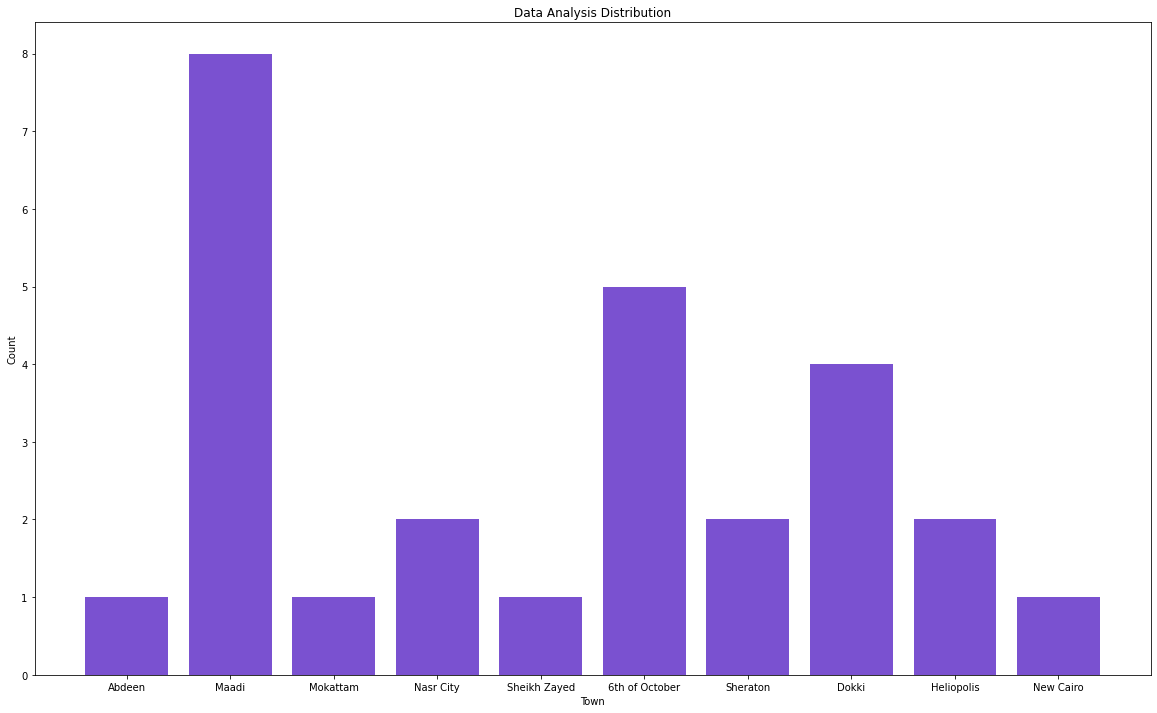

In [51]:
plt.figure(figsize=(20,12))
plt.xlabel('Town')
plt.ylabel('Count')
plt.title('Data Analysis Distribution')
plt.bar(range(len(town)-1), values, tick_label=names,color='#7a51d0')
plt.show()

In [52]:
work=Counter(data[data['job_title']=='Machine learning']['work_hours'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(work.items())],
     labels=[item[0] for item in sorted(work.items())],
     domain=dict(x=[0, 0.5]),
     name="Machine learning",title='Machine learning'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3','#f5cb42','#FF97FF']))


In [53]:
import requests
import urllib.parse

latitude = []
longitude = []
for address in c1.keys():
  url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

  response = requests.get(url).json()
  latitude.append(response[0]["lat"])
  longitude.append(response[0]["lon"])


In [54]:
values=list(c1.values())
values

[26, 1, 2, 10]

In [55]:
city_name=list(c1.keys())
city_name

['Cairo', 'New Delhi', 'Riyadh', 'Giza']

In [56]:
col_names=['latitude','longitude','values','city']

In [57]:
df_b=pd.DataFrame()
df_b['latitude']=latitude
df_b['longitude']=longitude
df_b['values']=values
df_b['city_name']=city_name

df_b

,latitude,longitude,values,city_name
0,30.0443879,31.2357257,26,Cairo
1,28.6138954,77.2090057,1,New Delhi
2,24.638916,46.7160104,2,Riyadh
3,29.9870753,31.2118063,10,Giza


In [58]:
df_b['latitude'] = df_b['latitude'].astype(float)

In [59]:
df_b['longitude'] = df_b['longitude'].astype(float)

In [60]:
fig = px.scatter_mapbox(df_b, lat='latitude', lon='longitude', size='values', size_max=100,
                         zoom=4.4, center=dict(lat=df_b['latitude'].mean() + 1, lon=df_b['longitude'].mean() - 1.5),
                        mapbox_style="stamen-terrain", title='Machine learning Distribution in Egypt', 
                       color='values')
fig.update_layout(title_x=0.5, height=800)
fig.show()

# Data Analysis

In [61]:
c1=Counter(data[data['job_title']=='Data Analysis']['experience'])
c1


Counter({'Entry Level': 129,
         'Manager': 135,
         'Experienced': 388,
         'Senior Management': 18})

In [62]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(c1.items())],
     labels=[item[0] for item in sorted(c1.items())],
     domain=dict(x=[0, 0.5]),
     name="Machine learning",title='Data Analysis'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3','#f5cb42','#FF97FF']))

In [63]:
c2=Counter(data[data['job_title']=='Data Analysis']['City'])
c2

Counter({'Alexandria': 37,
         'Cairo': 407,
         'Qalubia': 12,
         'Giza': 163,
         'Gharbia': 7,
         'Riyadh': 5,
         'Sharqia': 18,
         'Port Said': 2,
         'Monufya': 4,
         'Ismailia': 2,
         'Suez': 2,
         'Dubai': 2,
         'Tbilisi': 1,
         'Assiut': 1,
         'Jeddah': 1,
         'Dallas': 1,
         'Damietta': 1,
         'Red Sea': 1,
         'Aswan': 1,
         'Dakahlia': 1,
         'North Sinai': 1})

In [64]:
import requests
import urllib.parse

latitude = []
longitude = []
for address in c2.keys():
  if address == 'Qalubia' :
    address='Qalyubia'
  if address == 'Monufya' :
    address='Menoufia'
  if address=='Alexandria':
      latitude.append(31.205753)
      longitude.append(29.924526)
  else:  
      ur2 = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
      response = requests.get(ur2).json()
      latitude.append(response[0]["lat"])
      longitude.append(response[0]["lon"])


In [65]:
values=list(c2.values())
values

[37, 407, 12, 163, 7, 5, 18, 2, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [66]:
city_name=list(c2.keys())
city_name

['Alexandria',
 'Cairo',
 'Qalubia',
 'Giza',
 'Gharbia',
 'Riyadh',
 'Sharqia',
 'Port Said',
 'Monufya',
 'Ismailia',
 'Suez',
 'Dubai',
 'Tbilisi',
 'Assiut',
 'Jeddah',
 'Dallas',
 'Damietta',
 'Red Sea',
 'Aswan',
 'Dakahlia',
 'North Sinai']

In [67]:

data_df_b=pd.DataFrame()
data_df_b['latitude']=latitude
data_df_b['longitude']=longitude
data_df_b['values']=values
data_df_b['city_name']=city_name

data_df_b

,latitude,longitude,values,city_name
0,31.205753,29.924526,37,Alexandria
1,30.0443879,31.2357257,407,Cairo
2,30.33362925,31.22135686416373,12,Qalubia
3,29.9870753,31.2118063,163,Giza
4,30.8393003,30.9963429,7,Gharbia
5,24.638916,46.7160104,5,Riyadh
6,30.63327745,31.789373917991302,18,Sharqia
7,31.263235,32.305505,2,Port Said
8,30.4370098,30.746685163855833,4,Monufya
9,30.3671977,32.1565462,2,Ismailia


In [68]:
fig = px.scatter_mapbox(data_df_b, lat='latitude', lon='longitude', size='values', size_max=100,hover_name='city_name',
                         zoom=4.4, center=dict(lat=df_b['latitude'].mean() + 1, lon=df_b['longitude'].mean() - 1.5),
                        mapbox_style="stamen-terrain", title='Data Analysis Distribution in Egypt', 
                       color='values')
fig.update_layout(title_x=0.5, height=1000)

fig.show()

# Software Testing

In [69]:
c3=Counter(data[data['job_title']=='Software Testing']['City'])
c3

Counter({'Cairo': 576,
         'Giza': 186,
         'Red Sea': 4,
         'Alexandria': 26,
         'Jeddah': 3,
         'Vienna': 2,
         'Dakahlia': 6,
         'Qalubia': 6,
         'Dubai': 1,
         'Kuwait City': 2,
         'Riyadh': 11,
         'Muscat': 2,
         'Gharbia': 8,
         'Sharqia': 6,
         'Suez': 5,
         'Al Ahsa': 1,
         'Sohag': 1,
         'Tunis': 1,
         'Matruh': 2,
         'Abha': 1,
         'Aswan': 1})

In [70]:

latitude = []
longitude = []
for address in c3.keys():
  if address == 'Qalubia' :
    address='Qalyubia'
  if address == 'Monufya' :
    address='Menoufia'
  if address=='Alexandria':
      latitude.append(31.205753)
      longitude.append(29.924526)
  else:  
      ur3 = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
      response = requests.get(ur3).json()
      latitude.append(response[0]["lat"])
      longitude.append(response[0]["lon"])


In [71]:
values=list(c3.values())
values

[576, 186, 4, 26, 3, 2, 6, 6, 1, 2, 11, 2, 8, 6, 5, 1, 1, 1, 2, 1, 1]

In [72]:
city_name=list(c3.keys())
city_name

['Cairo',
 'Giza',
 'Red Sea',
 'Alexandria',
 'Jeddah',
 'Vienna',
 'Dakahlia',
 'Qalubia',
 'Dubai',
 'Kuwait City',
 'Riyadh',
 'Muscat',
 'Gharbia',
 'Sharqia',
 'Suez',
 'Al Ahsa',
 'Sohag',
 'Tunis',
 'Matruh',
 'Abha',
 'Aswan']

In [73]:
soft_df_b=pd.DataFrame()
soft_df_b['latitude']=latitude
soft_df_b['longitude']=longitude
soft_df_b['values']=values
soft_df_b['city_name']=city_name

soft_df_b

,latitude,longitude,values,city_name
0,30.0443879,31.2357257,576,Cairo
1,29.9870753,31.2118063,186,Giza
2,20.29654545,38.53429714399387,4,Red Sea
3,31.205753,29.924526,26,Alexandria
4,21.5810088,39.1653612,3,Jeddah
5,48.2083537,16.3725042,2,Vienna
6,31.13800465,31.88824986845627,6,Dakahlia
7,30.33362925,31.22135686416373,6,Qalubia
8,25.074282349999997,55.18853865430702,1,Dubai
9,29.3796532,47.9734174,2,Kuwait City


In [74]:
fig = px.scatter_mapbox(soft_df_b, lat='latitude', lon='longitude', size='values', size_max=100,hover_name='city_name',
                         zoom=4.4, center=dict(lat=df_b['latitude'].mean() + 1, lon=df_b['longitude'].mean() - 1.5),
                        mapbox_style="stamen-terrain", title='Software Testing Distribution in Egypt', 
                       color='values')
fig.update_layout(title_x=0.5, height=1000)

fig.show()